In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

        THE DATE CAN BE CHANGED ACCORDINGLY 

In [4]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 1)

  Use this https://pandas-datareader.readthedocs.io/en/latest/remote_data.htmlpage for hints and instructions

In [6]:
# Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

In [9]:
tickers=['BAC','C','JPM','WFC','GS','MS']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)#merging the data


In [10]:

bank_stocks.columns.names = ['Bank Ticker','Stock Info']


In [12]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()#to find the max of all banks

Bank Ticker
BAC     29.3406
C       75.4289
JPM    257.4635
WFC    104.5658
GS      52.6832
MS      59.8611
dtype: float64

In [13]:
#to returns from each bank
ret = pd.DataFrame()
for tick in tickers:
    ret[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
ret.head()

,BAC Return,C Return,JPM Return,WFC Return,GS Return,MS Return
date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.018642,0.013533,0.006458,0.001844,0.013240,0.000894
2017-01-05,-0.011765,-0.017424,-0.007445,-0.009204,-0.009171,-0.015522
2017-01-06,0.000000,0.003480,0.014835,0.000116,0.014577,-0.002538
2017-01-09,-0.005729,-0.005450,-0.008208,0.000697,-0.025998,-0.014536


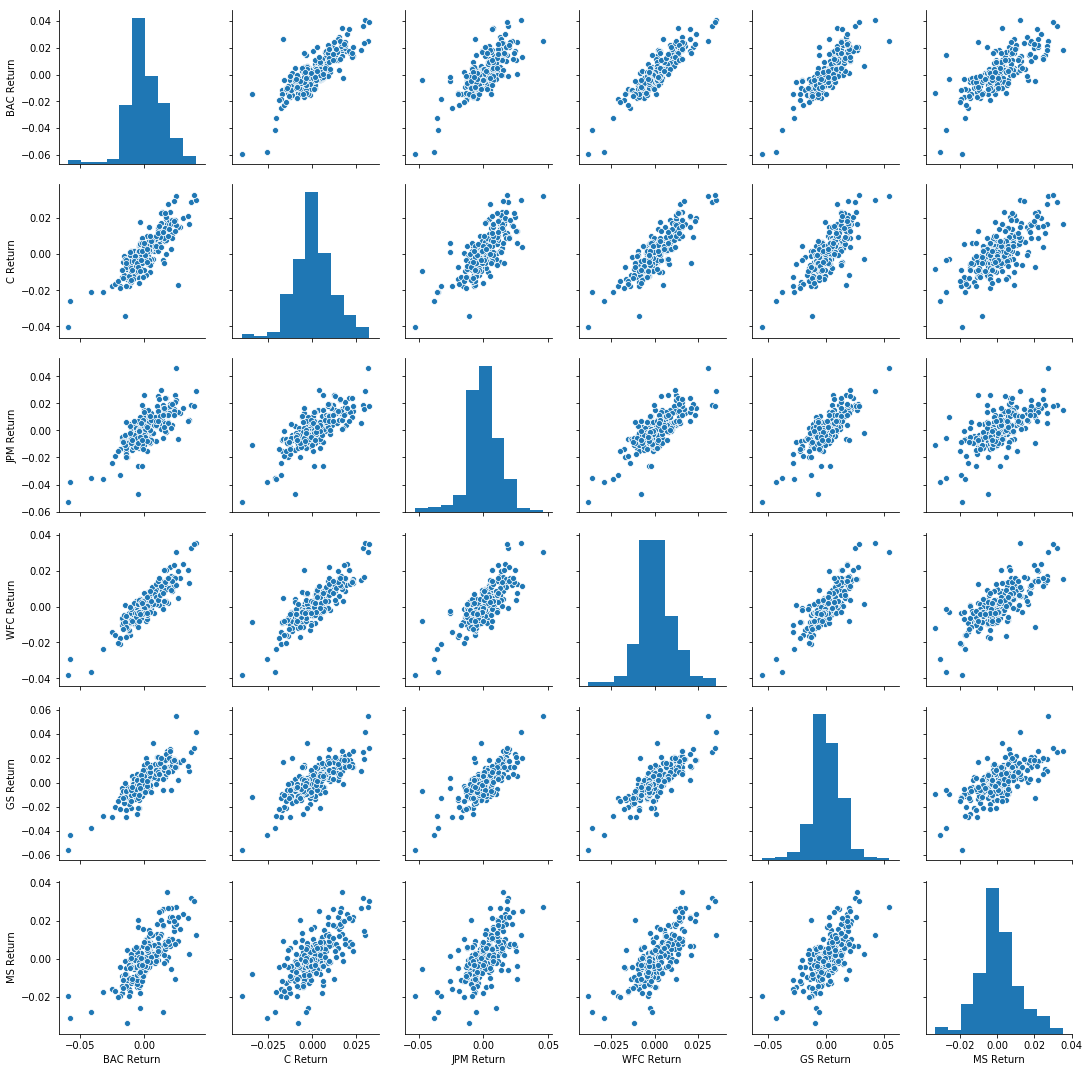

In [15]:
import seaborn as sns
sns.pairplot(ret[1:])#visulizing the data

In [16]:
ret.idxmin()#to find minimum returns along with dates for each bank

BAC Return    2017-05-17
C Return      2017-05-17
JPM Return    2017-05-17
WFC Return    2017-05-17
GS Return     2017-05-17
MS Return     2017-04-13
dtype: object

In [17]:
ret.idxmax()#to find maximum returns along with dates for each bank

BAC Return    2017-04-24
C Return      2017-11-28
JPM Return    2017-02-03
WFC Return    2017-04-24
GS Return     2017-02-03
MS Return     2017-01-25
dtype: object

In [18]:
ret.std()#to find the riskiest bank through standard deviation

BAC Return    0.013692
C Return      0.011037
JPM Return    0.012418
WFC Return    0.010230
GS Return     0.013111
MS Return     0.011173
dtype: float64

In [20]:
ret.ix['2017-02-01':'2017-12-30'].std()#to find standard deviation for a particular period of time

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.013533
C Return      0.010910
JPM Return    0.012384
WFC Return    0.010101
GS Return     0.012832
MS Return     0.010940
dtype: float64

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


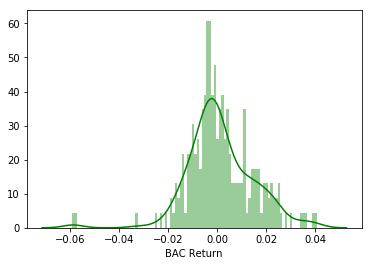

In [23]:
sns.distplot(ret.ix['2017-02-01':'2017-12-30']['BAC Return'],color='green',bins=100)# PLOTING THE DATA ON HISTAGRAM 

Further we will plot detailed graphs for accurate predictions.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

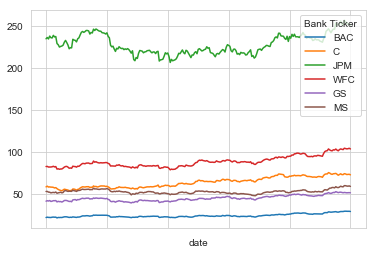

In [25]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

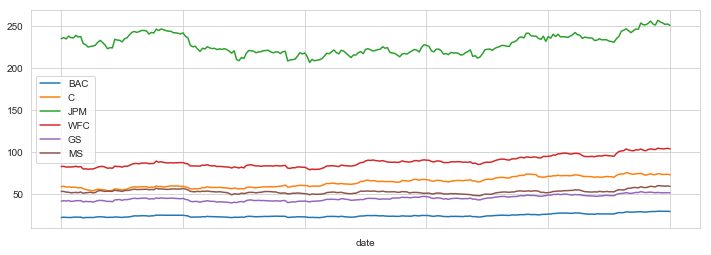

In [27]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


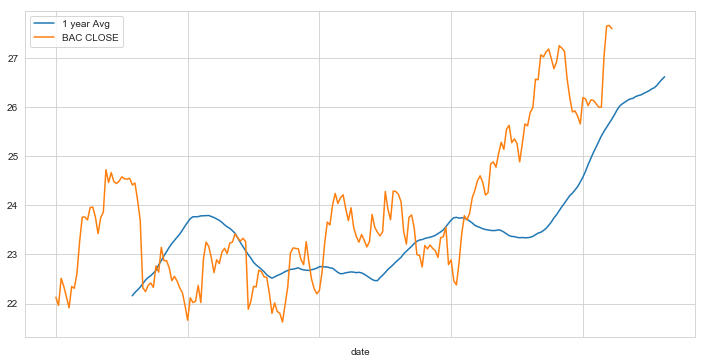

In [31]:
plt.figure(figsize=(12,6))#to plot a 1 year average for bank of america
BAC['close'].ix['2017-01-01':'2017-12-01'].rolling(window=30).mean().plot(label='1 year Avg')
BAC['close'].ix['2017-02-01':'2017-12-01'].plot(label='BAC CLOSE')
plt.legend()